# MNIST handwritten digit recognition using Large CNN

In [5]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt

In [10]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_test_copy = X_test.copy()
print(type(X_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


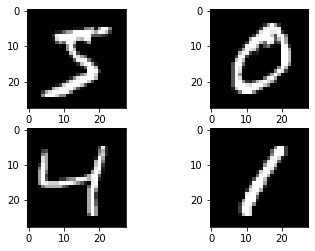

In [11]:
# plot 4 images as gray scale
plt.subplot(2,2,1)
plt.imshow(X_train[0], 'gray')
plt.subplot(2,2,2)
plt.imshow(X_train[1], 'gray')
plt.subplot(2,2,3)
plt.imshow(X_train[2], 'gray')
plt.subplot(2,2,4)
plt.imshow(X_train[3], 'gray')
# show the plot
plt.show()

In [12]:
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# In Keras, the layers used for two-dimensional convolutions expect pixel values with the dimensions:
# [pixels][width][height][channels].

In [13]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

This time we define a large CNN architecture with additional convolutional, max pooling layers and fully connected layers. The network topology can be summarized as follows.

1. Convolutional layer with 30 feature maps of size 5×5.
2. Pooling layer taking the max over 2*2 patches.
3. Convolutional layer with 15 feature maps of size 3×3.
4. Pooling layer taking the max over 2*2 patches.
5. Dropout layer with a probability of 20%.
6. Flatten layer.
7. Fully connected layer with 128 neurons and rectifier activation.
8. Fully connected layer with 50 neurons and rectifier activation.
9. Output layer.

In [14]:
# define the larger model
def larger_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [16]:
# build the model
model = larger_model()
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 33s 555us/step - loss: 0.3722 - accuracy: 0.8830 - val_loss: 0.0772 - val_accuracy: 0.9767
Epoch 2/10
60000/60000 [==============================] - 33s 552us/step - loss: 0.0950 - accuracy: 0.9709 - val_loss: 0.0579 - val_accuracy: 0.9814
Epoch 3/10
60000/60000 [==============================] - 31s 518us/step - loss: 0.0681 - accuracy: 0.9794 - val_loss: 0.0442 - val_accuracy: 0.9861
Epoch 4/10
60000/60000 [==============================] - 31s 519us/step - loss: 0.0534 - accuracy: 0.9832 - val_loss: 0.0313 - val_accuracy: 0.9908
Epoch 5/10
60000/60000 [==============================] - 31s 520us/step - loss: 0.0479 - accuracy: 0.9848 - val_loss: 0.0290 - val_accuracy: 0.9903
Epoch 6/10
60000/60000 [==============================] - 31s 520us/step - loss: 0.0410 - accuracy: 0.9875 - val_loss: 0.0282 - val_accuracy: 0.9904
Epoch 7/10
60000/60000 [==============================] 

In [17]:
print(history.history.keys())

# This dict can be used to plot the losses and accuracies

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


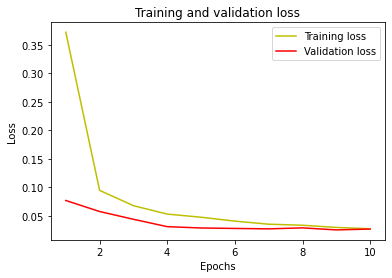

In [18]:
# Plotting the loss during training and validation

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

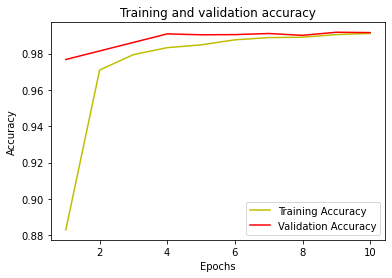

In [19]:
# Plotting the accuracy during training and validation

accu = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, accu, 'y', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()